# פרוייקט גמר- ניתוח נתונים

## קבוצה מספר -9 ,"Salary Prediction Classification"- שם הדאטה

<div> 
<img src="https://user-images.githubusercontent.com/103426109/169715350-617e1429-0080-491d-9788-b95b6fc0abe7.jpeg" width="500px">
</div>

#### מגישות:

   #### הודיה בשארי
   #### נועה ענקי
   #### עמית ששון
  ####  ירדן אוחנה

####  "https://www.kaggle.com/datasets/ayessa/salary-prediction-classification"-  קישור

### רקע על הדאטה

הדאטה שבחרנו עוסקת בניבוי שכר- האם אדם ירוויח מעל 50,000 דולר בשנה או פחות מכך. המידע נלקח מתוך מפקד אוכלוסין של שנת 1994.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
url = 'https://raw.githubusercontent.com/NoaAnaki/Our-project/main/salary.csv'
salary_df = pd.read_csv(url)

In [3]:
salary_df.shape

(32561, 15)

# נבדוק חריגות בכל קטגוריה

<Axes: >

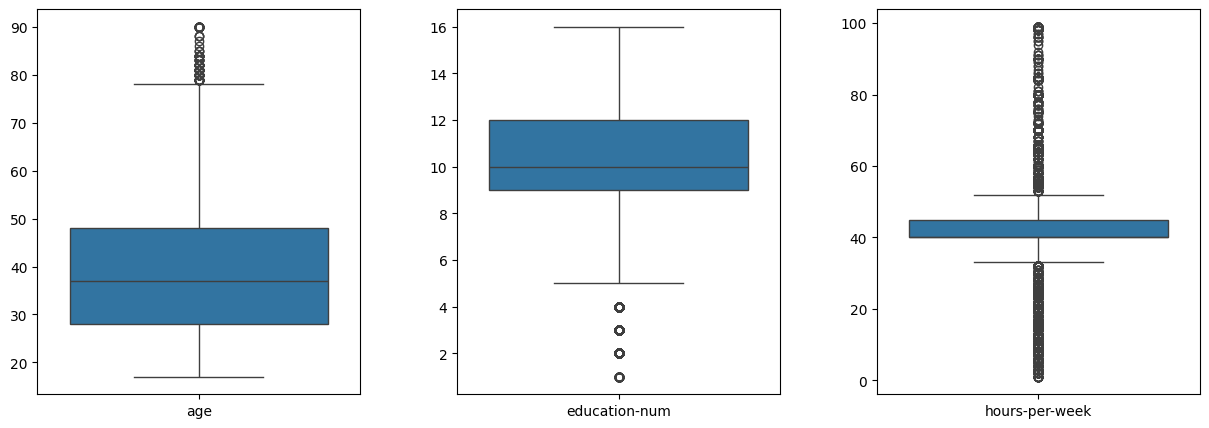

In [4]:
fig, ax = plt.subplots (figsize=(15, 5),  ncols=3)
plt.subplots_adjust(wspace = 0.3)
sns.boxplot(data = salary_df[['age' ]], ax = ax[0])
sns.boxplot(data = salary_df[['education-num']], ax = ax[1])
sns.boxplot(data = salary_df[['hours-per-week']], ax = ax[2])

גיל = ניתן לראות כי יש חריגה בקטגוריית הגיל, מעל גיל 80, 
למרות שבגילאים האלו רוב האנשים יוצאים לפנסיה ולא עובדים. בחרנו שלא להוריד אותם כי הם חלק משוק העבודה. (ואף מוערכים בעינינו)

רמת השכלה = ניתן לראות שישנה חריגה בטווח של רמת ההשכלה. רוב האנשים ממשיכים להשכלה גבוהה, אך מהתפלגות המידע ניתן להסיק כי יש בשוק העבודה אנשים שהחליטו לא להמשיך ללימודים גבוהים או שנשרו מבית הספר(הרמות הנמוכות ביותר בגרף). אנשים אלה עדיין חלק משוק העבודה ולכן החלטנו שלא להוריד אותם.

שעות עבודה לשבוע = ניתן לראות חריגה גם כלפי מעלה וגם כלפי מטה בטווח שעות עבודה נתייחס לזה במהלך העבודה לכן לא הורדנו.

<Axes: ylabel='Count'>

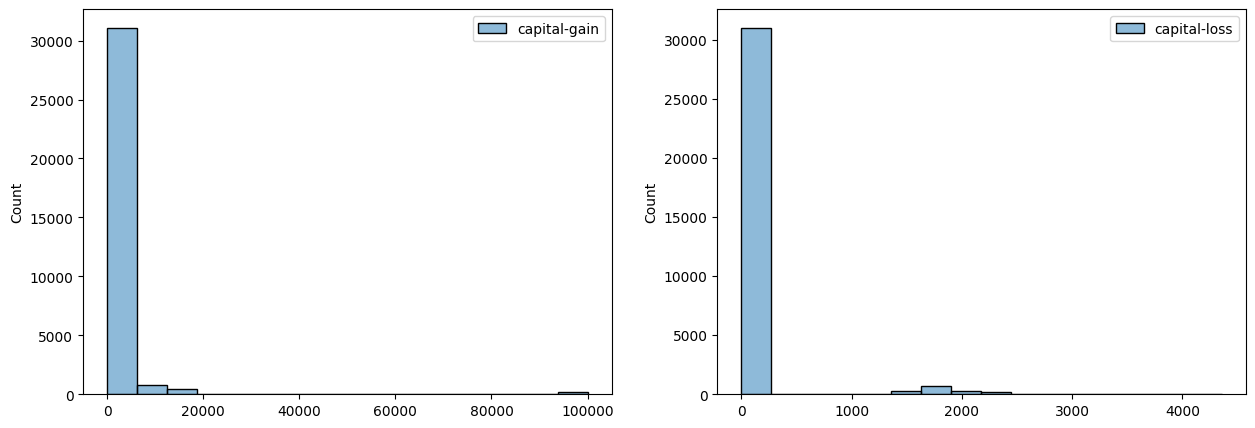

In [5]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)
sns.histplot(salary_df[["capital-gain"]], ax = axes[0])
sns.histplot(salary_df[["capital-loss"]], ax = axes[1])

.מהגרפים ניתן לראות כי רוב האנשים אינם מילאו את העמודות הנ"ל (רווח והפסד הון) ואין לנו אפשרות להשוות ביניהם. על כן החלטנו להוריד את העמודות האלו מהדאטה

In [6]:
salary_df=salary_df.drop(["capital-gain"], axis=1 )
salary_df =salary_df.drop(["capital-loss"], axis=1 )
salary_df=salary_df.drop(["native-country"], axis=1 )
salary_df=salary_df.drop(["fnlwgt"], axis=1 )

### נבדוק ערכים חסרים או לא נכונים ונוריד ערכים אשר אינם רלוונטים

In [7]:
salary_df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
salary            0
dtype: int64

 
 ניתן לראות כי אין ערכים שאינם תקינים, ולכן לא נבצע שינויים בדאטה.

In [8]:
salary_df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [9]:
salary_df["occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [10]:
salary_df["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

ניתן לראות שיש ערכים שאינם רלווטים לנו ואינם מספקים לנו מידע ולכן החלטנו להוריד אותם

In [11]:
salary_df=salary_df[salary_df.workclass!=' ?']
salary_df=salary_df[salary_df.occupation!=' ?']
salary_df=salary_df[salary_df.occupation!=' Other-service']
salary_df=salary_df[salary_df.race!=' Other']

# "מסקנה 1- "דמות אידיאלית

במסקנה כעת, נרצה לבדוק אילו קטגוריות משפיעות על גובה השכר השנתי.

.נבדוק כעת את הקורלציה בין עמודות שמבחינה הגיונית המתאם בניהן יהיה גבוה: שכר, שעות עבודה בשבוע ורמת השכלה 

In [12]:
salary_df.salary.replace([" <=50K", " >50K"],[0 ,1], inplace=True)

C:\Users\razel\AppData\Local\Temp\ipykernel_21732\3687889790.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  salary_df.salary.replace([" <=50K", " >50K"],[0 ,1], inplace=True)
C:\Users\razel\AppData\Local\Temp\ipykernel_21732\3687889790.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  salary_

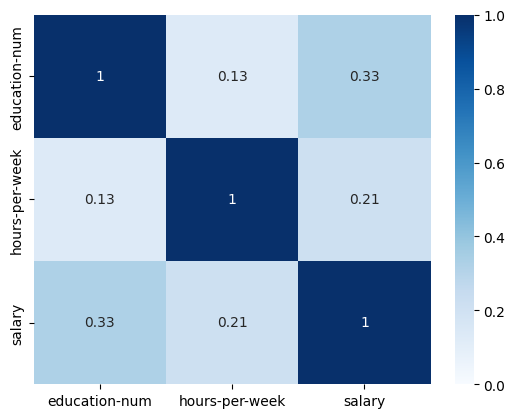

In [13]:
features1 = ['education-num','hours-per-week','salary']
correlation_matrix = salary_df[features1].corr()
sns.heatmap(correlation_matrix, vmin=0.0 , vmax = 1,cmap='Blues' , annot=True);

למרות הציפיה שהמתאמים יהיו גבוהים, נוכחנו לדעת כי קטגוריות אלו אינן משפיעות באופן מוחלט על גובה השכר. 
לכן ננסה לנתח את הדאטה מכיוון אחר.

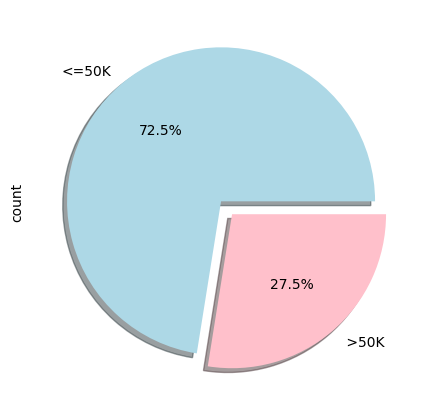

In [14]:
salary_df['salary'].replace([0, 1],["<=50K", " >50K"], inplace=True)
plt.figure(figsize=(15,5))
plt.xticks(rotation=55)
sex_percent = salary_df['salary'].value_counts().plot.pie(autopct='%1.1f%%', shadow = True, explode = (0.01, 0.1), colors = ['lightblue', 'pink'])

In [15]:
salary_df['salary'].replace(["<=50K", " >50K"],[0, 1], inplace=True)

C:\Users\razel\AppData\Local\Temp\ipykernel_21732\1013301934.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  salary_df['salary'].replace(["<=50K", " >50K"],[0, 1], inplace=True)


In [16]:
up_50 = salary_df.loc[(salary_df.salary==1)].reset_index()

.על מנת למצוא את הקריטריונים המשפיעים על קבלת משכורת הגבוהה מ50,000 דולר בשנה, ננתח דאטה חדשה אשר תמצא את "הדמות האדיאלית" לקבלת שכר זה 

In [17]:
def hours(series):
    if series < 16:
        return "1-15 hours"
    elif 16 <= series < 31:
        return "16-30 hours"
    elif 31 <= series < 46:
        return "31-45 hours"
    elif 46 <= series < 61:
        return "46-60 hours"
    elif 61 <= series:
        return "60-100 hours"

C:\Users\razel\AppData\Local\Temp\ipykernel_21732\3126005494.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=up_50,stat='percent', x="sex", multiple="dodge", shrink=.8 , palette="bright",ax=axes[0,0], color = ("orange") )
C:\Users\razel\AppData\Local\Temp\ipykernel_21732\3126005494.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=up_50 ,stat='percent', x="workclass", multiple="dodge", shrink=.8 , palette="bright",ax=axes[0,1], color = ("orange") )
C:\Users\razel\AppData\Local\Temp\ipykernel_21732\3126005494.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=up_50,stat='percent', x="hours_group", multiple="dodge", shrink=.8 , palette="bright",ax=axes[0,2], color = ("orange") )
C:\Users\razel\AppData\Local\Temp\ipykernel_21732\3126005494.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.his

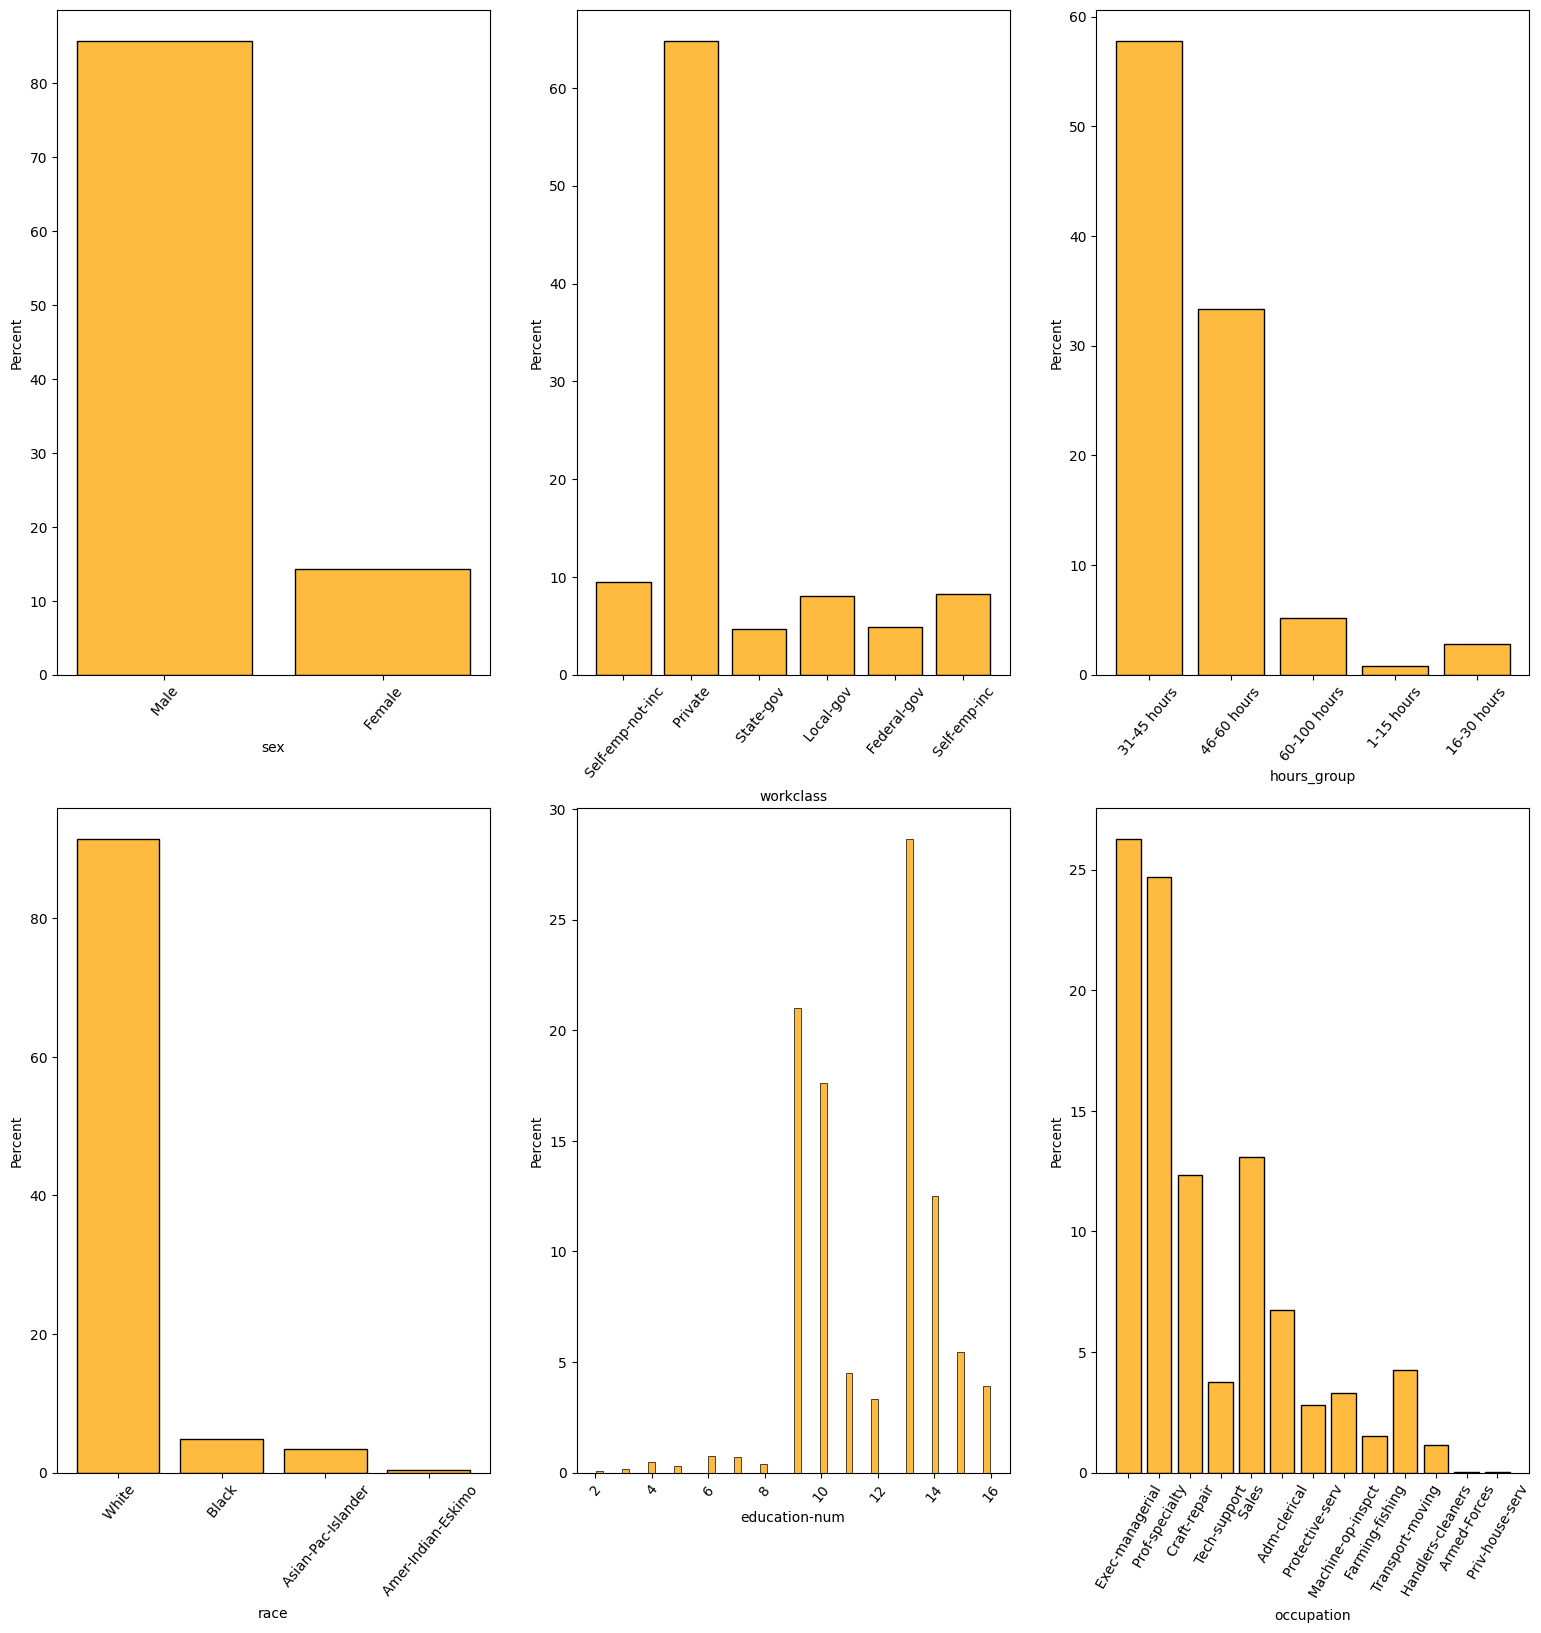

In [18]:
fig, axes= plt.subplots(2,3,figsize=(19,19))
axes[0,0].tick_params(axis='x', labelrotation=50)
sns.histplot(data=up_50,stat='percent', x="sex", multiple="dodge", shrink=.8 , palette="bright",ax=axes[0,0], color = ("orange") )
axes[0,1].tick_params(axis='x', labelrotation=50)
sns.histplot(data=up_50 ,stat='percent', x="workclass", multiple="dodge", shrink=.8 , palette="bright",ax=axes[0,1], color = ("orange") )
up_50['hours_group'] = up_50['hours-per-week'].apply(hours)
axes[0,2].tick_params(axis='x', labelrotation=50)
sns.histplot(data=up_50,stat='percent', x="hours_group", multiple="dodge", shrink=.8 , palette="bright",ax=axes[0,2], color = ("orange") )
axes[1,0].tick_params(axis='x', labelrotation=50)
sns.histplot(data=up_50 ,stat='percent', x="race", multiple="dodge", shrink=.8 , palette="bright",ax=axes[1,0], color = ("orange") )
axes[1,1].tick_params(axis='x', labelrotation=50)
sns.histplot(data=up_50,stat='percent', x="education-num", multiple="dodge", shrink=.8 , palette="bright" ,ax=axes[1,1], color = ("orange"))
axes[1,2].tick_params(axis='x', labelrotation=60)
sns.histplot(data=up_50 ,stat='percent', x="occupation", multiple="dodge", shrink=.8 , palette="bright",ax=axes[1,2], color = ("orange") );

 .מסקנה: חקרנו את הדאטה ובנינו "דמות אידיאלית" אשר לפיה נוכל לדעת איזה סוג אנשים מרוויחים יותר מ- 50 אלף דולר בשנה
.מצאנו כי "הדמות האידיאלית" עונה על הקריטריונים הבאים- גבר, ממוצא לבן, שעובד במגזר הפרטי בין 31-45 שעות, עם רמת משכל בגובה 13 ועובד לרוב כמנכל או פרופסור מומחה 

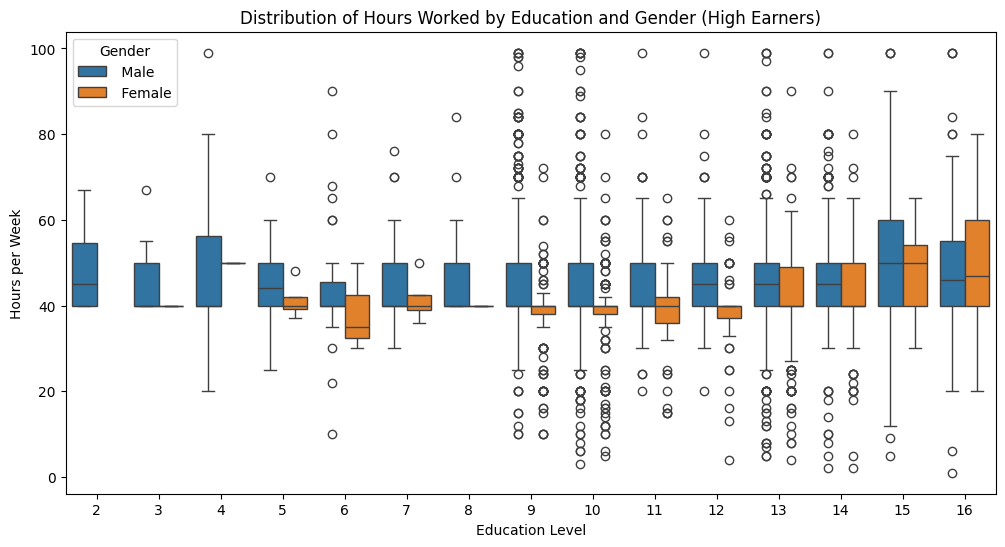

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=up_50, x='education-num', y='hours-per-week', hue='sex')
plt.title("Distribution of Hours Worked by Education and Gender (High Earners)")
plt.xlabel("Education Level")
plt.ylabel("Hours per Week")
plt.legend(title="Gender")
plt.show()


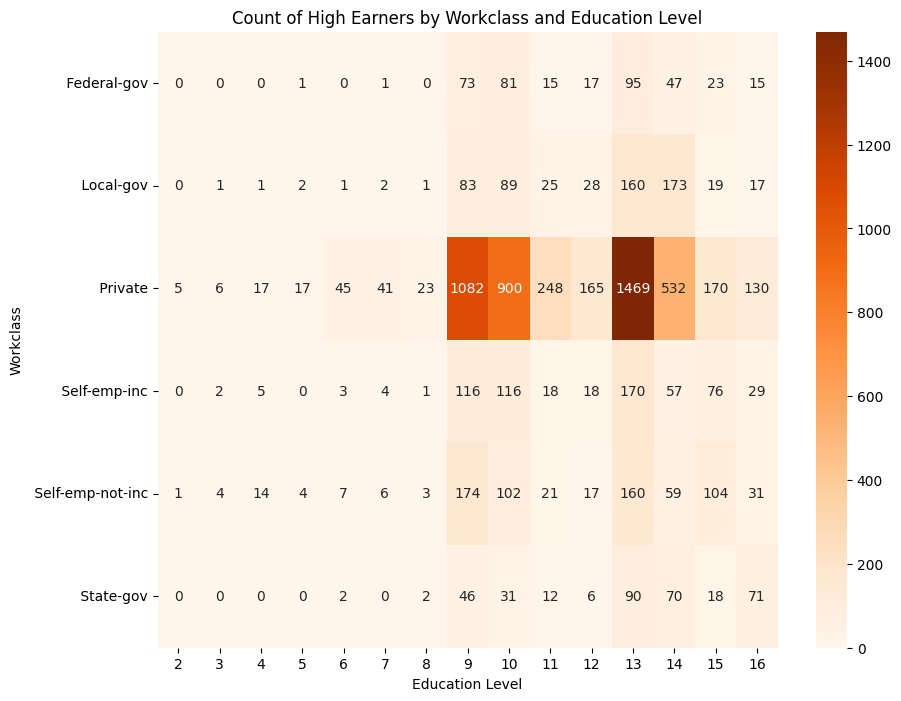

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pivot = up_50.pivot_table(index='workclass', columns='education-num', values='sex', aggfunc='count', fill_value=0)
plt.figure(figsize=(10,8))
sns.heatmap(pivot, annot=True, fmt='d', cmap='Oranges')
plt.title('Count of High Earners by Workclass and Education Level')
plt.xlabel('Education Level')
plt.ylabel('Workclass')
plt.show()


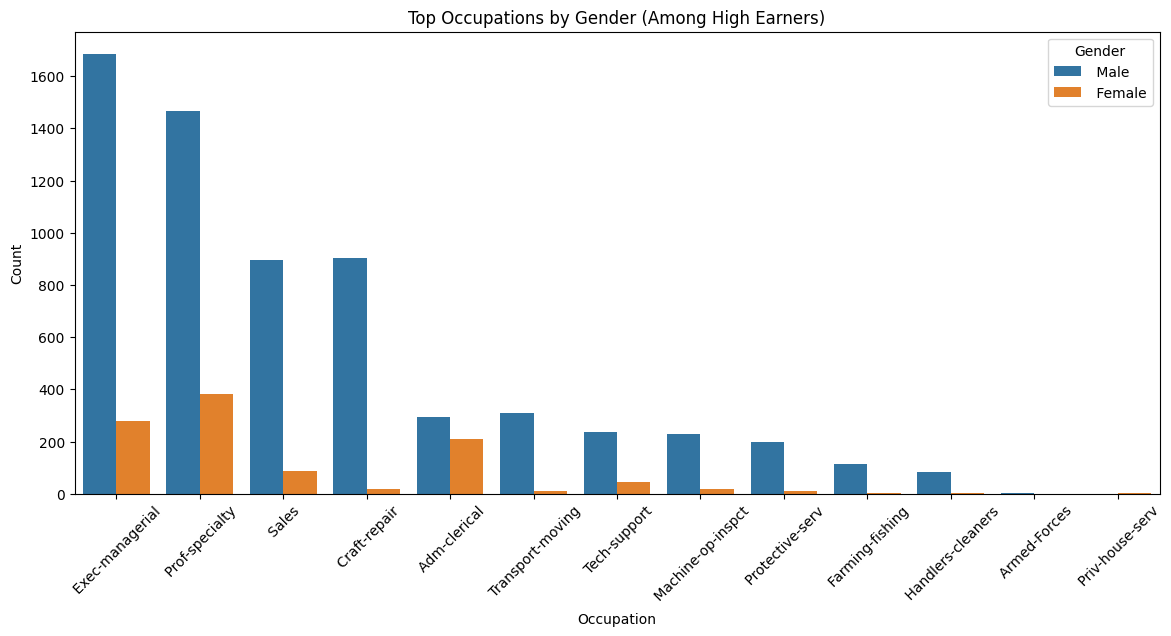

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
sns.countplot(data=up_50, x='occupation', hue='sex', order=up_50['occupation'].value_counts().index)
plt.title("Top Occupations by Gender (Among High Earners)")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.show()


# מסקנה 2-הפרכה או אימות של סטיגמות על אוכלוסיות נבחרות 

## אוכלוסיית גיל פרישה 

<div> 
<img src="https://user-images.githubusercontent.com/103426109/169715440-1acb3456-1ae8-4a7e-b4ab-87cbd7e70ef1.jpeg" width="500px">
</div>

בתחילת העבודה ראינו שיש חריגה בגיל. מחיפוש באינטרנט נמצא כי הגיל הממוצע לפנסיה הוא 65, ולכן אין הרבה אנשים שעובדים בגילאים בוגרים יותר. בנוסף ראינו שנשים יוצאות לפנסיה מוקדם יותר מגברים. 

<div> 
<img src="https://user-images.githubusercontent.com/103426109/169687942-2fa6851a-ae89-4273-a7c5-4da53e3f9b3d.jpg" width="500px">
</div>

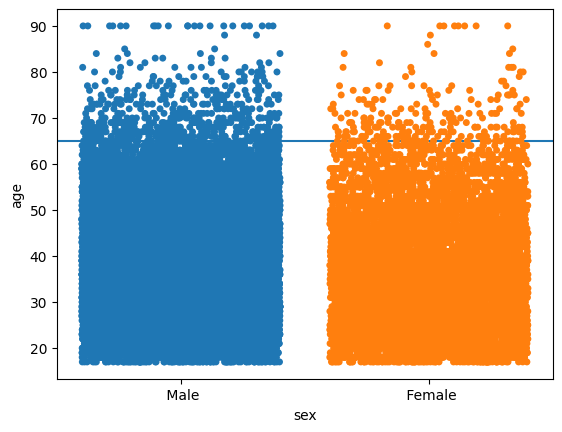

In [24]:
sns.stripplot(x="sex", y="age", data=salary_df, jitter=0.4, hue= 'sex').axhline(y=65);

החלטנו לבדוק את הנתון, וראינו שסביב גיל 65 מתחיל להיות פיזור בגרפים. אצל גרף הנשים פיזור הנקודות מתחיל בגיל מוקדם יותר מלגברים, וכמות הנקודות של הגברים והנשים אינן שוות ערך.
מפני שנשים יוצאות מוקדם יותר לפנסיה ובנוסף פחות נשים ממשיכות לעבוד לאחר גיל הפרישה הממוצע. לכן, החלטנו שהמסקנה שלנו תמדד באמצעות אחוזים ע"מ להשוות בצורה מדוייקת 

:נשווה קטגוריות כדי לנתח את ההבדלים בין גברים ונשים שממשיכים לעבוד בגיל הפרישה

In [25]:
def age(series):
    if 65 <= series <= 90:
        return "age 65-90"

salary_df['age_group'] = salary_df['age'].apply(age)
age_up_65 = salary_df.loc[(salary_df.age_group=="age 65-90")].reset_index()
age_up_65_male = age_up_65.loc[(age_up_65.sex==" Male")].reset_index()
age_up_65_female = age_up_65.loc[(age_up_65.sex==" Female")].reset_index()

C:\Users\razel\AppData\Local\Temp\ipykernel_21732\2613842485.py:2: FutureWarning: using <function <lambda> at 0x000001DFE8544220> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  age_up_65_1=age_up_65_male.groupby('relationship').size().agg(lambda x:x/age_up_65_male.shape[0]).sort_values()
C:\Users\razel\AppData\Local\Temp\ipykernel_21732\2613842485.py:8: FutureWarning: using <function <lambda> at 0x000001DFE836D300> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  age_up_65_2=age_up_65_female.groupby('relationship').size().agg(lambda x:x/age_up_65_female.shape[0]).sort_values()


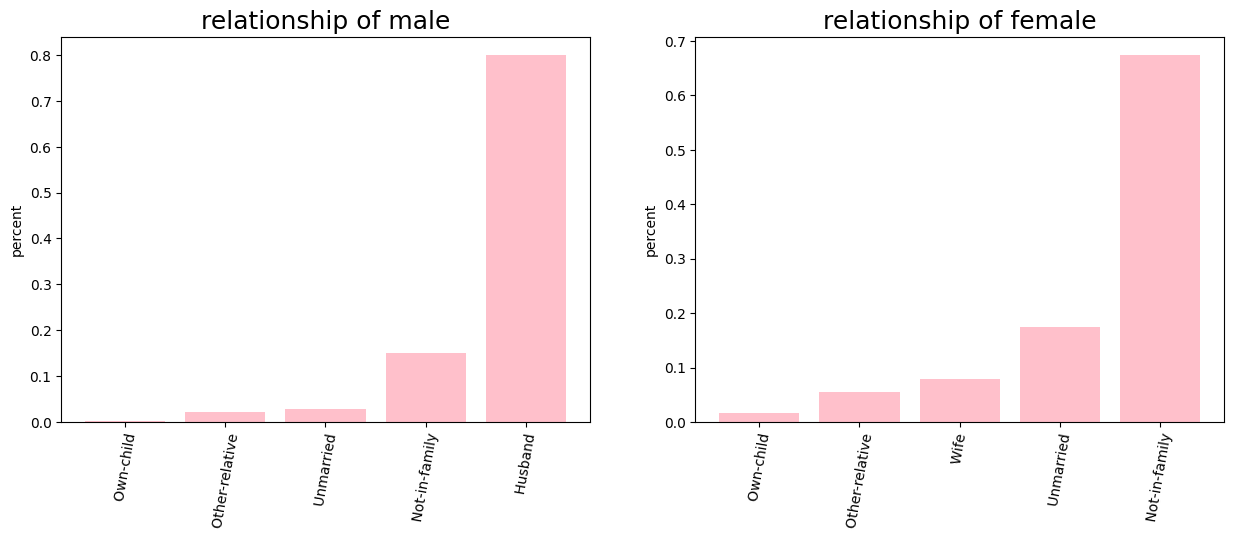

In [26]:
fig, axes= plt.subplots(figsize=(15,5), ncols=2)
age_up_65_1=age_up_65_male.groupby('relationship').size().agg(lambda x:x/age_up_65_male.shape[0]).sort_values()
plt.subplot(1, 2, 1)
plt.xticks(rotation=80)
plt.bar(age_up_65_1.index,age_up_65_1.tolist(), color = ("pink", "pink"))
plt.ylabel('percent')
plt.title('relationship of male', fontsize = 18)
age_up_65_2=age_up_65_female.groupby('relationship').size().agg(lambda x:x/age_up_65_female.shape[0]).sort_values()
plt.subplot(1, 2, 2)
plt.xticks(rotation=80)
plt.bar(age_up_65_2.index,age_up_65_2.tolist(), color = ("pink", "pink"))
plt.ylabel('percent')
plt.title('relationship of female', fontsize = 18)
plt.show()

בקטגוריית "מערכת יחסים", ניתן לראות כי הרוב המוחלט של הנשים שממשיכות לעבוד בגיל הפנסיה אינן בעלות משפחה, לעומת גברים שהינם נשואים.

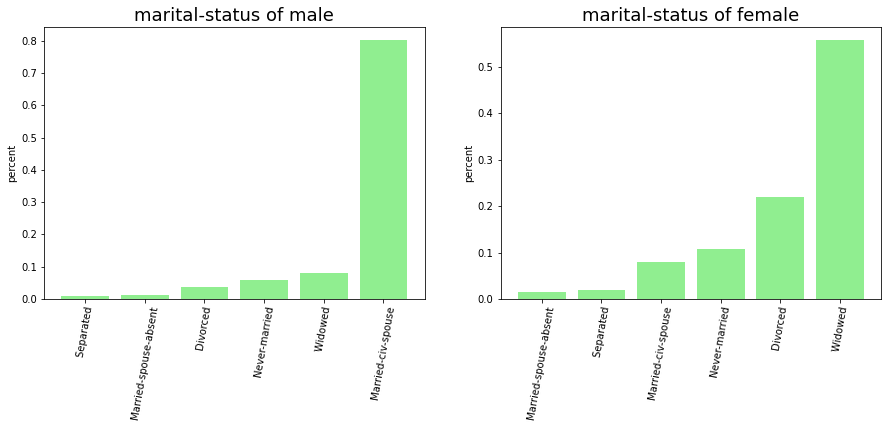

In [21]:
fig, axes= plt.subplots(figsize=(15,5), ncols=2)
age_up_65_1=age_up_65_male.groupby('marital-status').size().agg(lambda x:x/age_up_65_male.shape[0]).sort_values()
plt.subplot(1, 2, 1)
plt.xticks(rotation=80)
plt.bar(age_up_65_1.index,age_up_65_1.tolist(), color = ("lightgreen", "lightgreen"))
plt.ylabel('percent')
plt.title('marital-status of male', fontsize = 18)
age_up_65_2=age_up_65_female.groupby('marital-status').size().agg(lambda x:x/age_up_65_female.shape[0]).sort_values()
plt.subplot(1, 2, 2)
plt.xticks(rotation=80)
plt.bar(age_up_65_2.index,age_up_65_2.tolist(), color = ("lightgreen", "lightgreen"))
plt.ylabel('percent')
plt.title('marital-status of female', fontsize = 18)
plt.show()

  בקטגוריית "מצב משפחתי", ניתן לראות כי הרוב המוחלט של הנשים שממשיכות לעבוד בגיל הפנסיה הן אלמנות, לעומת גברים שהינם נשואים נישואין אזרחי.

In [22]:
age_up_65_male['salary'].replace([0, 1],["<=50K", " >50K"], inplace=True)
age_up_65_female['salary'].replace([0, 1],["<=50K", " >50K"], inplace=True)

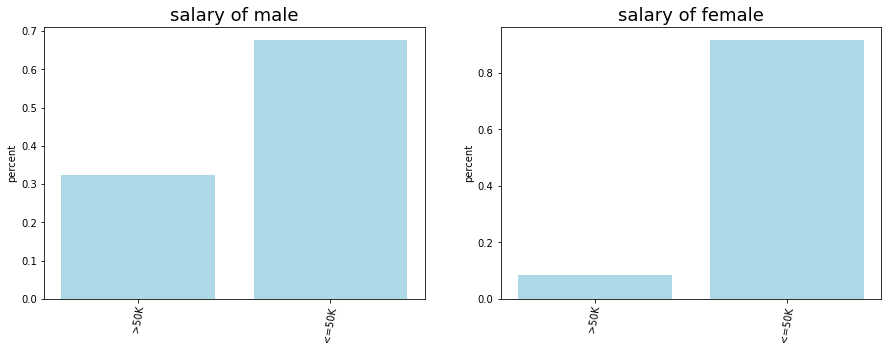

In [23]:
fig, axes= plt.subplots(figsize=(15,5), ncols=2)
age_up_65_1=age_up_65_male.groupby('salary').size().agg(lambda x:x/age_up_65_male.shape[0]).sort_values()
plt.subplot(1, 2, 1)
plt.xticks(rotation=80)
plt.bar(age_up_65_1.index,age_up_65_1.tolist(), color = ("lightblue", "lightblue"))
plt.ylabel('percent')
plt.title('salary of male', fontsize = 18)
age_up_65_2=age_up_65_female.groupby('salary').size().agg(lambda x:x/age_up_65_female.shape[0]).sort_values()
plt.subplot(1, 2, 2)
plt.xticks(rotation=80)
plt.bar(age_up_65_2.index,age_up_65_2.tolist(), color = ("lightblue", "lightblue"))
plt.ylabel('percent')
plt.title('salary of female', fontsize = 18)
plt.show()

בקטגורית "השכר", כשבדקנו את אחוז הנשים מול הגברים שמרוויחים מעל 50 אלף ראינו שאצל גברים הפער בין מי שעובד מעל או מתחת לחמישים אלף קטן יותר לעומת נשים.
משמע יותר גברים מסכימים/ נאלצים לעבוד גם לאחר גיל הפרישה בלי  קשר לשכר

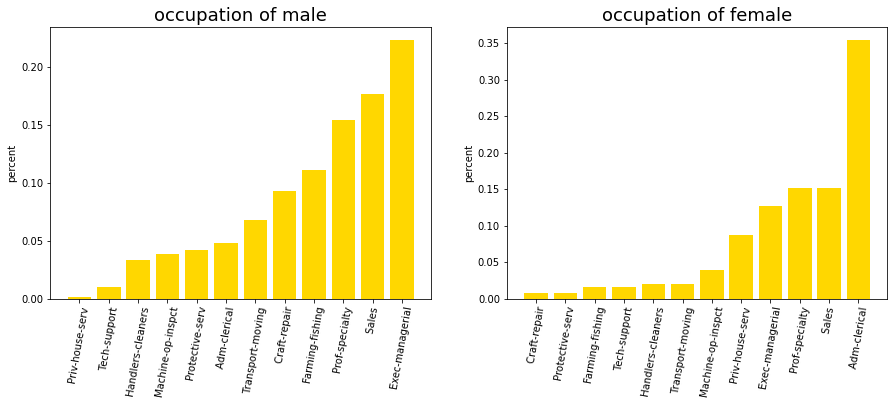

In [24]:
fig, axes= plt.subplots(figsize=(15,5), ncols=2)
age_up_65_1=age_up_65_male.groupby('occupation').size().agg(lambda x:x/age_up_65_male.shape[0]).sort_values()
plt.subplot(1, 2, 1)
plt.xticks(rotation=80)
plt.bar(age_up_65_1.index,age_up_65_1.tolist(), color = ("gold", "gold"))
plt.ylabel('percent')
plt.title('occupation of male', fontsize = 18)
age_up_65_2=age_up_65_female.groupby('occupation').size().agg(lambda x:x/age_up_65_female.shape[0]).sort_values()
plt.subplot(1, 2, 2)
plt.xticks(rotation=80)
plt.bar(age_up_65_2.index,age_up_65_2.tolist(), color = ("gold", "gold"))
plt.ylabel('percent')
plt.title('occupation of female', fontsize = 18)
plt.show()

  בקטגוריית סוגי- עבודה", ניתן לראות כי אצל גברים יש אחוז מאוד גבוה שעובדים כמנכלים לאחר גיל הפרישה לעומת נשים שהאחוזים מאוד נמוכים ואצל נשים רובן עובדות כפקידות לעומת הגברים שאחוזי הפקידים מאוד נמוכים.

לאחר שראינו שיש הבדל בממוצע גיל הפרישה בין נשים וגברים,
רצינו לחקור במה נשים לעומת גברים עובדים/ מרוויחים ומה הסטטוס שלהם בחיים.
כשבדקנו את הסטטוס ראינו שיותר גברים נשואים ממשיכים לעבוד לאחר גיל הפרישה מאשר נשים בממוצע.
כשבדקנו במה הם עובדים אצל גברים ניתן לראות שלמעלה מ30 אחוז עובדים בתור מנכלים ואצל נשים מעל 20 אחוז עובדות כפקידות. בנוסף, ניתן לראות שאחוז הנשים העובדות כמנכליות לאחר גיל הפרישה הוא 0.05. ואצל גברים אחוז הגברים שעובדים כפקידים לאחר גיל הפרישה הוא 0.013. מה שמעיד על ההבדלים בין נשים לגברים לפני כשלושה עשורים.
כשבדקנו את אחוז הנשים מול הגברים שמרוויחים מעל 50 אלף ראינו שאצל גברים הפער בין מי שעובד מעל או מתחת לחמישים אלף קטן יותר לעומת נשים.
משמע יותר גברים מסכימים/ נאלצים לעבוד גם לאחר גיל הפרישה בלי  קשר לשכר

## אוכלוסיית הנשים ונשות משפחה 

<div> 
<img src="https://user-images.githubusercontent.com/103426109/169715381-1956da3c-e19e-427c-8e0a-335c8d2cc7af.jpeg" width="500px">
</div>

In [3]:
salary_df.pivot_table(["hours-per-week"], "sex").mean()

hours-per-week    39.419224
dtype: float64

ניתן לראות שממוצע השעות בדאטה הוא כ-40 שעות ולכן נחלק את השעות למי שעובד מעל, מתחת ובממוצע שעות זה

In [4]:
def hours(series):
    if series < 40:
        return 0
    elif series==40:
        return 1
    elif 41 <= series:
        return 2

salary_df['mean_hours'] = salary_df['hours-per-week'].apply(hours)
salary_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,mean_hours
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [5]:
family_female = salary_df.loc[ ((salary_df.relationship == " Own-child") & (salary_df.sex == " Female"))].reset_index().copy()
family_female = family_female.drop(columns=['index'])
no_family_female = salary_df.loc[((salary_df.relationship == " Not-in-family")& (salary_df.sex == " Female")) | ((salary_df.relationship == " Unmarried")& (salary_df.sex == " Female"))].reset_index().copy()
no_family_female = no_family_female.drop(columns=['index'])

In [6]:
no_family_female['salary'].replace([0, 1],["<=50K", " >50K"], inplace=True)
family_female['salary'].replace([0, 1],["<=50K", " >50K"], inplace=True)

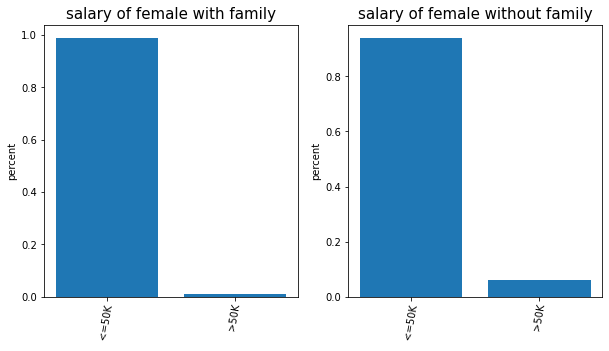

In [11]:
fig, axes= plt.subplots(figsize=(10,5), ncols=1)
family_female.sort_values(by='salary', ascending=False)
salary_family_female=family_female.groupby('salary').size().agg(lambda x:x/family_female.shape[0])
plt.subplot(1, 2, 1)
plt.xticks(rotation=80)
plt.bar(salary_family_female.index,salary_family_female.tolist())
plt.ylabel('percent')
plt.title('salary of female with family', fontsize = 15)
no_family_female.sort_values(by='salary', ascending=False)
salary_no_family_famale=no_family_female.groupby('salary').size().agg(lambda x:x/no_family_female.shape[0])
plt.subplot(1, 2, 2)
plt.xticks(rotation=80)
plt.bar(salary_no_family_famale.index,salary_no_family_famale.tolist())
plt.ylabel('percent')
plt.title('salary of female without family', fontsize = 15)
plt.show()

In [13]:
family_up_50_female= family_female.loc[family_female.salary==" >50K"].reset_index()
no_family_up_50_female =no_family_female.loc[no_family_female.salary==" >50K"].reset_index()

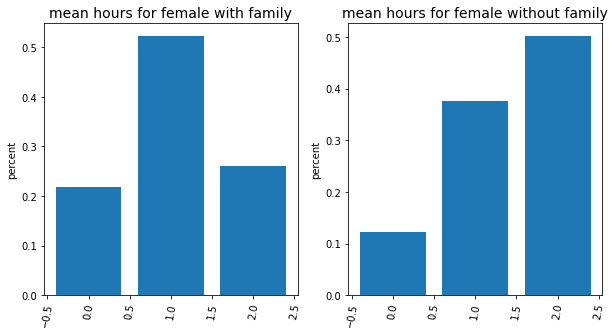

In [31]:
fig, axes= plt.subplots(figsize=(10,5), ncols=1)
family_up_50_female.sort_values(by='mean_hours', ascending=False)
hours_family_female=family_up_50_female.groupby('mean_hours').size().agg(lambda x:x/family_up_50_female.shape[0])
plt.subplot(1, 2, 1)
plt.xticks(rotation=80)
plt.bar(hours_family_female.index,hours_family_female.tolist())
plt.ylabel('percent')
plt.title('mean hours for female with family', fontsize = 14)
no_family_up_50_female.sort_values(by='mean_hours', ascending=False)
hours_no_family_female=no_family_up_50_female.groupby('mean_hours').size().agg(lambda x:x/no_family_up_50_female.shape[0])
plt.subplot(1, 2, 2)
plt.xticks(rotation=80)
plt.bar(hours_no_family_female.index,hours_no_family_female.tolist())
plt.ylabel('percent')
plt.title('mean hours for female without family', fontsize = 14)
plt.show()

In [32]:
family_male = salary_df.loc[ ((salary_df.relationship == " Own-child") & (salary_df.sex == " Male"))].reset_index().copy()
family_male = family_male.drop(columns=['index'])
no_family_male = salary_df.loc[((salary_df.relationship == " Not-in-family")& (salary_df.sex == " Male")) | ((salary_df.relationship == " Unmarried")& (salary_df.sex == " Male"))].reset_index().copy()
no_family_male = no_family_male.drop(columns=['index'])

In [33]:
no_family_male['salary'].replace([0, 1],["<=50K", " >50K"], inplace=True)
family_male['salary'].replace([0, 1],["<=50K", " >50K"], inplace=True)

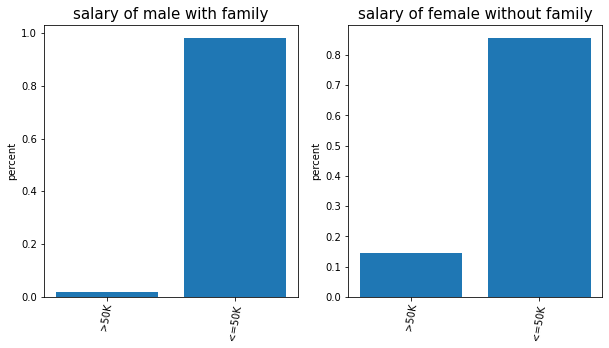

In [34]:
fig, axes= plt.subplots(figsize=(10,5), ncols=1)
family_male.sort_values(by='salary', ascending=False)
age_family=family_male.groupby('salary').size().agg(lambda x:x/family_male.shape[0])
plt.subplot(1, 2, 1)
plt.xticks(rotation=80)
plt.bar(age_family.index,age_family.tolist())
plt.ylabel('percent')
plt.title('salary of male with family', fontsize = 15)
no_family_male.sort_values(by='salary', ascending=False)
age_no_family=no_family_male.groupby('salary').size().agg(lambda x:x/no_family_male.shape[0])
plt.subplot(1, 2, 2)
plt.xticks(rotation=80)
plt.bar(age_no_family.index,age_no_family.tolist())
plt.ylabel('percent')
plt.title('salary of female without family', fontsize = 15)
plt.show()

In [35]:
family_up_50_male= family_male.loc[family_male.salary==" >50K"].reset_index()
no_family_up_50_male =no_family_male.loc[no_family_male.salary==" >50K"].reset_index()

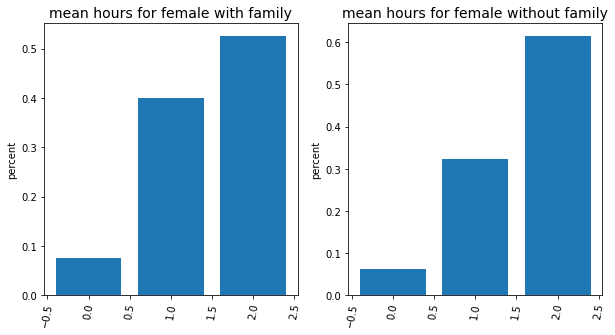

In [36]:
fig, axes= plt.subplots(figsize=(10,5), ncols=1)
family_up_50_male.sort_values(by='mean_hours', ascending=False)
age_family=family_up_50_male.groupby('mean_hours').size().agg(lambda x:x/family_up_50_male.shape[0])
plt.subplot(1, 2, 1)
plt.xticks(rotation=80)
plt.bar(age_family.index,age_family.tolist())
plt.ylabel('percent')
plt.title('mean hours for female with family', fontsize = 14)
no_family_up_50_male.sort_values(by='mean_hours', ascending=False)
age_no_family=no_family_up_50_male.groupby('mean_hours').size().agg(lambda x:x/no_family_up_50_male.shape[0])
plt.subplot(1, 2, 2)
plt.xticks(rotation=80)
plt.bar(age_no_family.index,age_no_family.tolist())
plt.ylabel('percent')
plt.title('mean hours for female without family', fontsize = 14)
plt.show()

רצינו לבדוק אם קיימים הבדלים בשכר ובממוצע שעות עבודה בין נשים עם וללא וילדים.
במשכורות גילנו שאחוז הנשים ללא ילדים שמרוויחות מעל 50 אלף  גדול יותר מאשר הנשים עם הילדים.
רצינו להתעמק ולבדוק האם קיימים הבדלים בין הנשים המרוויחות למעלה מ50 אלף.
גילנו שאצל הנשים עם ילדים כחצי מהם עובדות לפי הממוצע שעות הנורמטיבי החודשי (40 שעות) והשאר מתפלג באופן כמעט שווה למעל ומתחת לממוצע ואילו אצל נשים ללא ילדים כמחצית מהם עובדות מעל שעות הממוצע בחודש ויורד לינארית לממוצע ולפחות מהממוצע. 
לאחר מכן רצינו לעשות את אותה השוואה בדיוק בין גברים עם ילדים לגברים ללא ילדים ולראות אם יש הבדל.
ניתן לראות שאצל גברים עם וללא ילדים הרוב המוחלט עובד בממוצע או מעל הממוצע לעומת נשים עם ילדים שהרוב המוחלט עובד בממוצע או מתחת לממוצע.
מכאן ניתן להסיק המון מסקנות לגבי האילוצים והצרכים של גברים ונשים עם ילדים וללא ילדים באותה התקופה.

# מגזר ציבורי VS מסקנה 3- מגזר פרטי 

רצינו לבדוק את ההבדלים בין סוגי המגזרים 

In [37]:
salary_df['salary'].replace([0, 1],["<=50K", " >50K"], inplace=True)
salary_df['salary'].replace([0, 1],["<=50K", " >50K"], inplace=True)

<AxesSubplot:xlabel='workclass', ylabel='Count'>

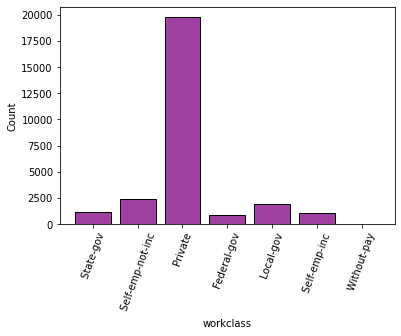

In [38]:
plt.xticks(rotation=70)
sns.histplot(data=salary_df, x="workclass", multiple="dodge", shrink=.8 , palette="bright" , color = ("purple"))

רוב האנשים עובדים במגזר הפרטי

In [39]:
workclass_privat= salary_df.loc[salary_df.workclass==" Private"].reset_index()

נבדוק כמה אנשים באחוזים מרוויחים במגזר הפרטי 

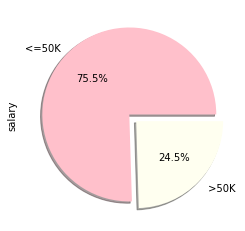

In [40]:
salary_private = workclass_privat['salary'].value_counts().plot.pie(autopct='%1.1f%%', shadow = True, explode = (0.01, 0.1), colors = ['pink', 'ivory'])

לעומתם נבדוק אנשים במגזר הציבורי

In [41]:
workclass_gov= salary_df.loc[(salary_df.workclass==" Federal-gov") |(salary_df.workclass==" Local-gov") |(salary_df.workclass==" State-gov")].reset_index()

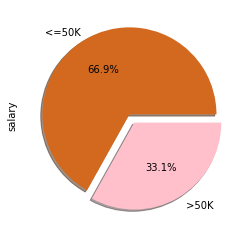

In [42]:
salary_gov = workclass_gov['salary'].value_counts().plot.pie(autopct='%1.1f%%', shadow = True, explode = (0.01, 0.1), colors = ['chocolate', 'pink'])

אנו רואים שהסיכוי כאשר אתה עובד במגזר הציבורי להרוויח מעל 50,000 דולר בשנה גבוה יותר מאשר במגזר הפרטי 

מסקנה 3: במגזר הפרטי הסיכוי להרוויח מעל 50 אלף נמוך יותר מאשר במגזר הציבורי ועדיין רוב האנשים נוטים לעבוד במגזר הפרטי כמו שראינו בגרף הראשון

# חיזוי- מודל עץ

<div> 
<img src="https://user-images.githubusercontent.com/103426109/169715472-f030c544-e0bd-436a-8748-53eb9698db2f.jpeg" width="500px">
</div>

ננסה לבנות מודל לניבוי גובה שכר.

In [43]:
def hours(series):
    if series < 16:
        return "1-15 hours"
    elif 16 <= series < 31:
        return "16-30 hours"
    elif 31 <= series < 46:
        return "31-45 hours"
    elif 46 <= series < 61:
        return "46-60 hours"
    elif 61 <= series:
        return "60-100 hours"

In [44]:
male = salary_df.loc[(salary_df.sex==" Male")].reset_index()
male['hours_group'] = male['hours-per-week'].apply(hours)

In [45]:
def get_acc(max_depth, train_X, test_X, train_y, test_y):
    model = sk.tree.DecisionTreeClassifier(criterion="gini", max_depth=max_depth, random_state=15)
    model.fit(train_X, train_y)
    preds_val = model.predict(test_X)
    acc = sk.metrics.accuracy_score(preds_val, test_y)
    return(acc)

In [46]:
data_tree = pd.get_dummies(male[['workclass','education-num','occupation','race','hours_group']])
data_tree['salary'] = male['salary']

In [47]:
features = ['education-num', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black', 'race_ White', 'hours_group_1-15 hours', 'hours_group_16-30 hours', 'hours_group_31-45 hours', 'hours_group_46-60 hours', 'hours_group_60-100 hours'] 
X = data_tree[features] 
y = data_tree['salary']  
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=15) 
my_model = DecisionTreeClassifier(criterion="gini",max_depth=4,random_state=15)
my_model.fit(X_train, y_train)
prediction = my_model.predict(X_test)
acc = sk.metrics.accuracy_score(prediction,y_test)
acc

0.7317327766179541

In [48]:
for max_depth in [1, 2, 3, 4, 5,7,9,13,17,25,30]:
    my_acc = get_acc(max_depth, X_train, X_test, y_train, y_test)
    print(max_depth, my_acc)

1 0.7176409185803758
2 0.7242519137091162
3 0.7273834377174669
4 0.7317327766179541
5 0.7353862212943633
7 0.7348643006263048
9 0.7343423799582464
13 0.7336464857341684
17 0.7334725121781489
25 0.7284272790535838
30 0.7272094641614475


In [49]:
import sklearn.tree as tree
def plot_tree(tree_model,feat,size=(15,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat)  
    plt.show()

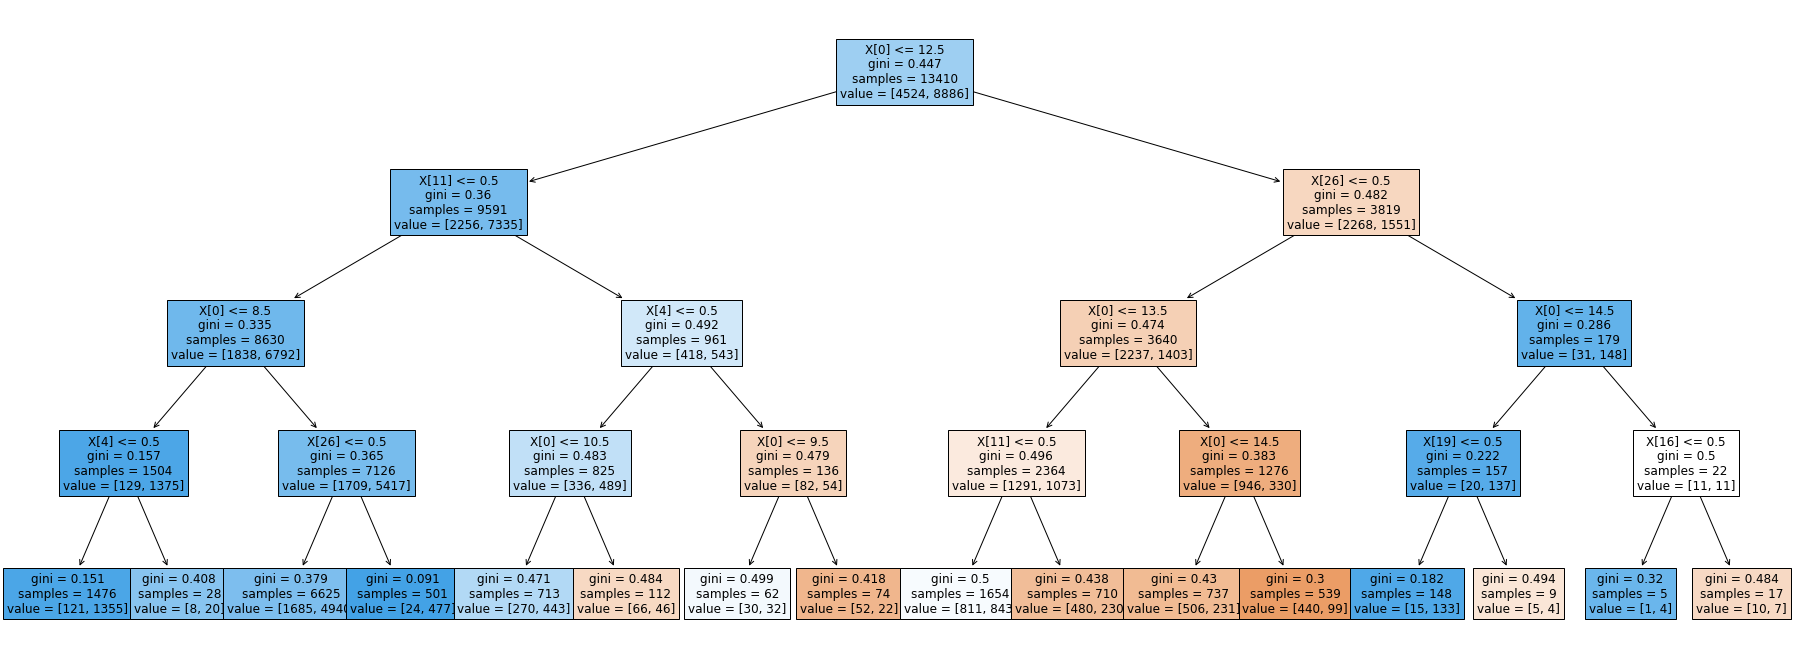

In [50]:
plt.figure(figsize=(32,12)) 
tree.plot_tree(my_model, fontsize=12,filled=True);

  הצלחנו לבנות מודל לחיזוי- האם אדם ירוויח יותר מ50,000 דולר בשנה או פחות מכך, הצלחנו להגיע לדיוק של 0.73. 